# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [80]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 
data = pd.read_csv('weight-height.csv')

print(data.head())
data.describe()

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [73]:
data = data = pd.read_csv('weight-height.csv')
male_height = (data[data.Gender == 'Male']).loc[:,'Height']
fem_height = (data[data.Gender == 'Female']).loc[:,'Height']
male_weight = (data[data.Gender == 'Male']).loc[:,'Weight']
fem_weight = (data[data.Gender == 'Female']).loc[:,'Weight']

male_df =  (data[data.Gender == 'Male']).describe()
female_df = (data[data.Gender == 'Female']).describe()

m_mean_height = male_df.loc['mean']['Height']
m_std_height = male_df.loc['std']['Height']
m_mean_weight = male_df.loc['mean']['Weight']
m_std_weight = male_df.loc['std']['Weight']

f_mean_height = female_df.loc['mean']['Height']
f_std_height = female_df.loc['std']['Height']
f_mean_weight = female_df.loc['mean']['Weight']
f_std_weight = female_df.loc['std']['Weight']

male_df

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

,Height,Weight
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

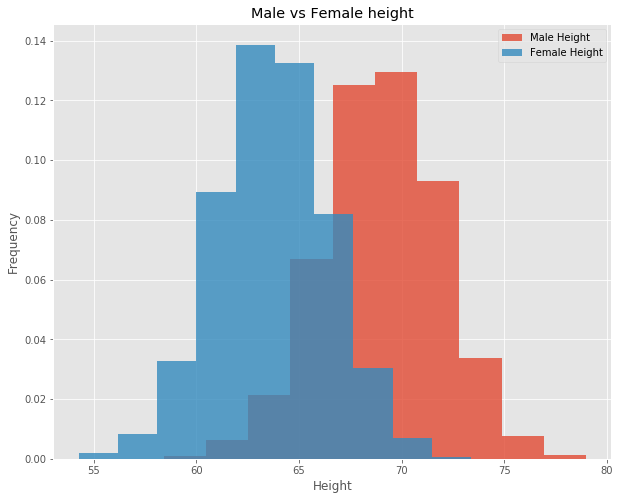

In [49]:
plt.figure(figsize = (10,8))
plt.hist(male_height, bins = 10, density = True, alpha = 0.8)
plt.hist(fem_height,bins = 10, density = True, alpha =0.8)
plt.legend(['Male Height','Female Height'])
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Male vs Female height')
plt.show()

In [50]:
# Record your observations - are these inline with your personal observations?
# Males are taller than women in general. There is an overlap between 58.406905 (min male height) and 73.389586 (max female height)
# Most females seem to be around 62 and most males are around 72.

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

In [57]:
import numpy as np

def density(var):
    n, bins = np.histogram(var, 10, density = 1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx,pdfy

#Generate test data and test the function - uncomment to run the test

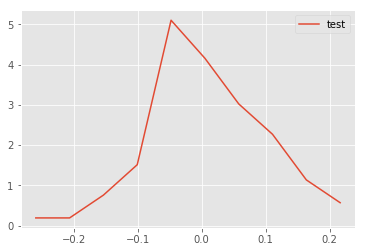

In [68]:
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

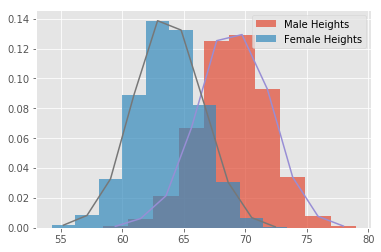

In [67]:
# You code here 
plt.figure()
a,b = density(male_height)
c,d = density(fem_height)
plt.hist(male_height, bins = 10, density = True, alpha = 0.7,label = "Male Heights")
plt.hist(fem_height,bins = 10, density = True, alpha =0.7, label = 'Female Heights')
plt.legend()
plt.plot(a,b)
plt.plot(c,d)


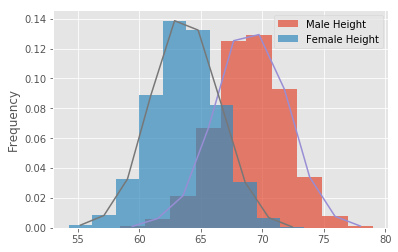

#### Repeat above exerice for male and female weights

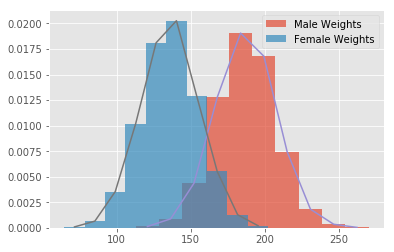

In [77]:
# Your code here 

plt.figure()
e,f = density(male_weight)
g,h = density(fem_weight)
plt.hist(male_weight, bins = 10, density = True, alpha = 0.7,label = "Male Weights")
plt.hist(fem_weight,bins = 10, density = True, alpha =0.7, label = 'Female Weights')
plt.legend()
plt.plot(e,f)
plt.plot(g,h)

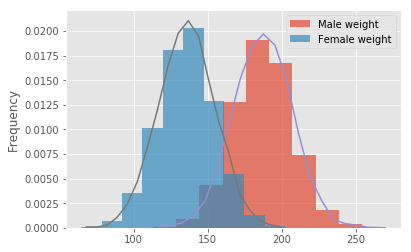

#### Write your observations in the cell below.

In [78]:
# Record your observations - are these inline with your personal observations?

# Females are lighter and shorter
# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

Text(0.5,1,'Comparing Heights')

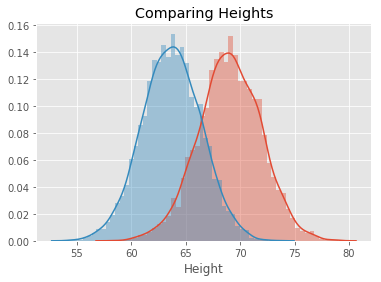

In [86]:
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.distplot(male_height)
sns.distplot(fem_height)
plt.title('Comparing Heights')


Text(0.5,1,'Comparing Weights')

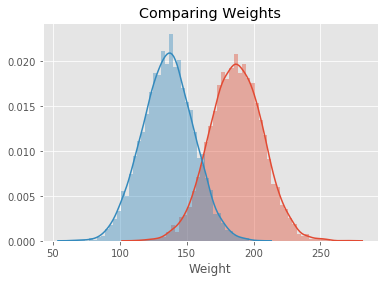

In [87]:
sns.distplot(male_weight)
sns.distplot(fem_weight)
plt.title('Comparing Weights')

Text(0.5,1,'Comparing Weights')

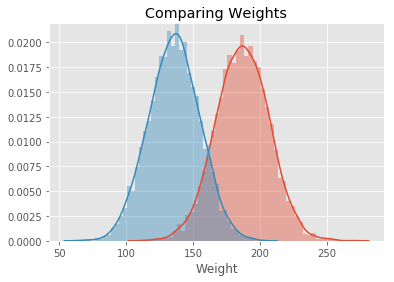

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.